# Tarea Semanal 5
## Ejercicio 1
Proponga una función transferencia normalizada de primer orden que permita rotar la fase, sin alterar el módulo. 
1. Dibuje el diagrama de polos y ceros
2. Dibuje la respuesta de fase en función de la frecuencia 
3. Calcule el retardo de grupo

Se propone la siguiente función transferencia:
$$T(s)=\frac{s-\sigma}{s+\sigma}$$

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

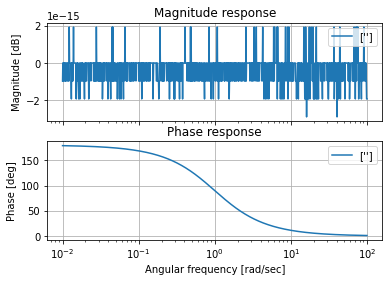

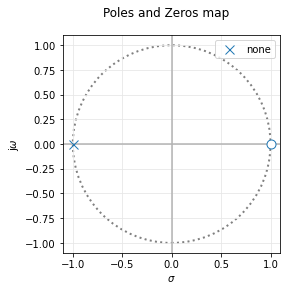

In [45]:
from splane import pzmap, bodePlot
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt

my_tf = TransferFunction( [1, -1], [1, 1] )

bodePlot(my_tf)
pzmap(my_tf)

El retardo de grupo se calcula mediante la siguiente expresión:
$$\tau(w)=-\frac{\partial\varphi(w)}{\partial w} $$

$$\varphi(w)=arctg(\frac{-w}{\sigma})-arctg(\frac{w}{\sigma})=-2arctg(\frac{w}{\sigma})$$

$$\tau(w)=-\frac{\partial}{\partial w}[-2arctg(\frac{w}{\sigma})]=\frac{\frac{2}{\sigma}}{1+(\frac{w}{\sigma})^2}$$

Proponga una topología activa y una pasiva que implementen el diagrama de polos y ceros del punto anterior. Obtenga los valores de componentes pasivos (resistencias y capacitores) para lograr que la rotación de fase sea de 15° en ω=1 (medida respecto de la fase en ω=0).

Para implementar el diagrama de polos y ceros del punto anterior de forma pasiva, se propone implementar una red Lattice con los siguientes componentes:
<div>
<img src="img/lattice-generico.PNG" alt="Drawing" style="width: 400px;"/>
</div>

Considerando $Z_1=Z_4$ y $Z_2=Z_3$, el circuito responde a la siguiente transferencia:
$$T(s)=\frac{Z_2-Z_1}{Z_2+Z_1}$$

Para poder lograr la respuesta deseada, se usa el siguiente circuito:
<div>
<img src="img/lattice.PNG" alt="Drawing" style="width: 400px;"/>
</div>

La respuesta de este circuito es:
$$T(s)=\frac{s-\frac{1}{RC}}{s+\frac{1}{RC}}$$

Para lograr la rotación de fase deseada:
$$\frac{\pi}{12}=-2arctg(wRC)$$


In [20]:
import numpy as np

RC = np.tan((np.pi/12)/(2))
print("RC={:.4f}".format(RC))

RC=0.1317


Adopto $R=1$ y $C=0,1317$

Con estos valores, hago la simulación en LTSpice
<div>
<img src="img/simulacion.PNG" alt="Drawing" style="width: 800px;"/>
</div>

Para implementar mediante una red activa, se utilizará la siguiente topología:
<div>
<img src="img/lattice-generico-activo.PNG" alt="Drawing" style="width: 400px;"/>
</div>

La respuesta de este circuito, considerando $R_3=R_4$ es:
$$T(s)=\frac{s-\frac{1}{R_5C_3}}{s+\frac{1}{R_5C_3}}$$

Para lograr la fase deseada, adopto $R=1$ y $C=0,1317$. La simulación arroja el siguiente resultado:
<div>
<img src="img/simulacion-activo.PNG" alt="Drawing" style="width: 800px;"/>
</div>

## Ejercicio 2

Considere la siguiente expresión generalizada de una transferencia bicuadrática:
<div>
<img src="img/bicuad.PNG" alt="Drawing" style="width: 200px;"/>
</div>

1. Considerando que el denominador de T(s) se corresponde con el de un filtro pasa-altos Butterworth de segundo orden, especifique las condiciones necesarias para los parámetros k, Qn, ωn, Qp, y ωP de forma tal que la transferencia final resulte:
<div>
<img src="img/transferencias.PNG" alt="Drawing" style="width: 800px;"/>
</div>

En cada caso, grafique además el diagrama de polos y ceros, detallando las coordenadas de todas las singularidades.

2. Proponga un circuito normalizado, de ser posible pasivo, que tenga la respuesta indicada.


#### Filtro 1
Se corresponde con un Notch pasabajos. La transferencia de un Notch pasabajos es:
$$T_{NLP}(s)=k.\frac{s^2+w_z^2}{s^2+s\frac{w_o}{Q}+w_o^2}$$
siendo $$w_z>w_o$$

La ganancia en altas frecuencias es definida por $k$, que en este caso debe ser $k=0,2512$ para obtener $-12dB$
En altas frecuencias la ganancia se define con la relación $0dB=(\frac{w_z}{w_o})^2.k$. Sabiendo el valor de $k=0,2512$ y adoptando $w_o=1$, obtenemos $w_z=1,9952$.
Traduciendo estas restricciones a la fórmula del enunciado, se obtienen las siguientes condiciones de diseño:
$$w_p=1$$
$$Q_p=\frac{1}{\sqrt{2}}$$
$$w_n=1,9952$$
$$Q_n\rightarrow\infty$$
$$k=0,2512$$

Para verificar estos valores, se realizan las siguientes simulaciones:

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

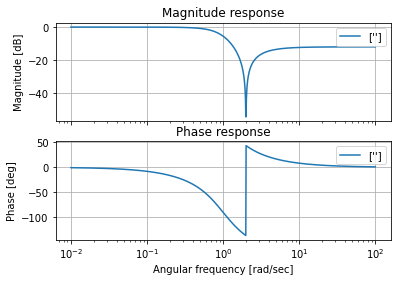

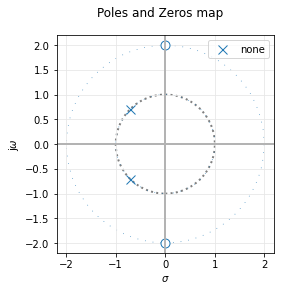

In [33]:
w_p = 1
w_n = 1.9952
k = 0.2512

my_tf = TransferFunction( [k, 0, k*w_n**2], [1, np.sqrt(2), w_p**2] )

bodePlot(my_tf)
pzmap(my_tf)

Para implementar esta respuesta mediante una red pasiva, se utilizará la siguiente estructura:
<div>
<img src="img/vff.PNG" alt="Drawing" style="width: 400px;"/>
</div>

Este filtro tiene la siguiente respuesta:
$$T(s)=b.\frac{s^2+s\frac{Ga}{Cb}+\frac{d}{CbL}}{s^2+s\frac{G}{C}+\frac{1}{LC}}$$

Para cumplir con las condiciones propuestas, los valores serán:
$$a=0$$
$$b=0,2512$$
$$d=1$$

$$L=1$$
$$C=1$$
$$R=\frac{1}{\sqrt{2}}$$

Simulando el circuito en LTSpice se obtuvieron los siguientes resultados:
<div>
<img src="img/simulacion-a.PNG" alt="Drawing" style="width: 800px;"/>
</div>

#### Filtro 2
Se puede ver que el filtro no presenta ni atenuaciones en bajas frecuencias ni altas frecuencias, por lo que $k=1$ y $w_n=w_p$. En $w_o$ la atenuación es de $6dB$, por lo tanto la relación $\frac{w_n}{Q_n}\frac{Q_p}{w_p}=0,5012$. Entonces $\frac{Q_p}{Q_n}=0,5012$. Por ser un Butterworth de 2° orden, $Q_p=\frac{1}{\sqrt{2}}$, entonces $Q_n=1,4075$

En conclusión, las condiciones de diseño son:
$$w_p=1$$
$$Q_p=\frac{1}{\sqrt{2}}$$
$$w_n=1$$
$$Q_n=1,4075$$
$$k=1$$

Para verificar estos valores, se realizan las siguientes simulaciones

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

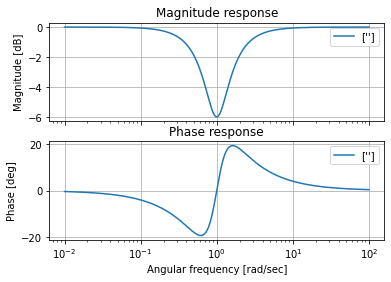

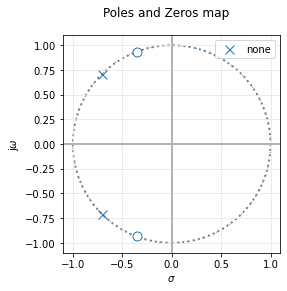

In [47]:
w_p = 1
w_n = 1
Q_n = 1.4075
k = 1

my_tf = TransferFunction( [k, (k*w_n)/Q_n, k*w_n**2], [1, np.sqrt(2), w_p**2] )

bodePlot(my_tf)
pzmap(my_tf)

Para implementar esta respuesta mediante una red pasiva, se utilizará la siguiente estructura:
<div>
<img src="img/vff.PNG" alt="Drawing" style="width: 400px;"/>
</div>

Este filtro tiene la siguiente respuesta:
$$T(s)=b.\frac{s^2+s\frac{Ga}{Cb}+\frac{d}{CbL}}{s^2+s\frac{G}{C}+\frac{1}{LC}}$$

Para cumplir con las condiciones propuestas, los valores serán:
$$a=0,502$$
$$b=1$$
$$d=1$$

$$L=1$$
$$C=1$$
$$R=\frac{1}{\sqrt{2}}$$

Simulando el circuito en LTSpice se obtuvieron los siguientes resultados:
<div>
<img src="img/simulacion-b.PNG" alt="Drawing" style="width: 800px;"/>
</div>

#### Filtro 3
A partir de la gráfica de fase se puede concluir que el filtro es un pasatodo con pulsación angular en $w=0,6$. Por lo tanto la transferencia será:
$$T(s)=\frac{s^2-s0,6\sqrt{2}+0,6^2}{s^2+s0,6\sqrt{2}+0,6^2}$$

Para cumplir con estas condiciones, se usan los siguientes valores:
$$w_p=0,6$$
$$Q_p=\frac{1}{\sqrt{2}}$$
$$w_n=-0,6$$
$$Q_n=\frac{1}{\sqrt{2}}$$
$$k=1$$

Para verificar estos valores, se realizan las siguientes simulaciones

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

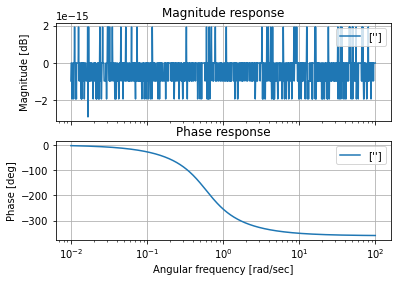

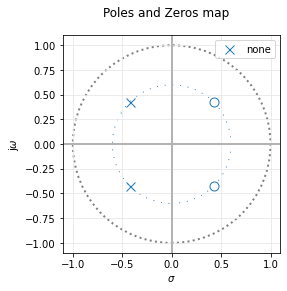

In [42]:
w_p = 0.6
w_n = 0.6
Q_p = 1/np.sqrt(2)
Q_n = -1/np.sqrt(2)

k = 1

my_tf = TransferFunction( [k, (k*w_n)/Q_n, k*w_n**2], [1, w_p/Q_p, w_p**2] )

bodePlot(my_tf)
pzmap(my_tf)

Para implementar el diagrama de polos y ceros del punto anterior de forma pasiva, se propone implementar una red Lattice con los siguientes componentes:
<div>
<img src="img/lattice-generico.PNG" alt="Drawing" style="width: 400px;"/>
</div>

Considerando $Z_1=Z_4$ y $Z_2=Z_3$, el circuito responde a la siguiente transferencia:
$$T(s)=\frac{Z_2-Z_1}{Z_2+Z_1}$$

Haciendo $Z_1=R$ y $Z_2=sL+\frac{1}{sC}$ se llega a la siguiente transferencia:
$$T(s)=\frac{s^2-s\frac{R}{L}+\frac{1}{LC}}{s^2+s\frac{R}{L}+\frac{1}{LC}}$$

Para cumplir con las condiciones, se adoptaron los valores
$$R=0,8485$$
$$L=1$$
$$C=2,78$$

Simulando el circuito en LTSpice se obtuvieron los siguientes resultados:
<div>
<img src="img/simulacion-c.PNG" alt="Drawing" style="width: 800px;"/>
</div>

#### Filtro 4
Se puede observar un salto de $\pi$ radianes en la fase, lo que muestra que hay un cero sobre el eje $jw$ cuando $w=3$. Por lo tanto, la transferencia tendrá la siguiente expresión:
$$T(s)=\frac{s^2+9}{s^2+s\sqrt{2}+1}$$

En conclusión, las condiciones de diseño son:
$$w_p=1$$
$$Q_p=\frac{1}{\sqrt{2}}$$
$$w_n=3$$
$$Q_n\rightarrow\infty$$
$$k=1$$

Para verificar los cálculos, se realizan las siguientes simulaciones:

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

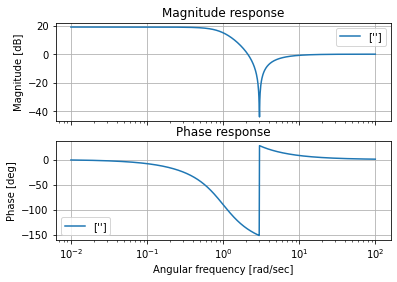

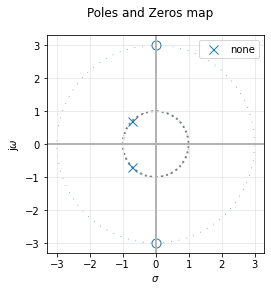

In [39]:
w_p = 1
w_n = 3
k = 1

my_tf = TransferFunction( [k, 0, k*w_n**2], [1, np.sqrt(2), w_p**2] )

bodePlot(my_tf)
pzmap(my_tf)

Para implementar esta respuesta mediante una red pasiva, se utilizará la siguiente estructura:
<div>
<img src="img/vff.PNG" alt="Drawing" style="width: 400px;"/>
</div>

Este filtro tiene la siguiente respuesta:
$$T(s)=b.\frac{s^2+s\frac{Ga}{Cb}+\frac{d}{CbL}}{s^2+s\frac{G}{C}+\frac{1}{LC}}$$

Para cumplir con las condiciones propuestas, los valores serán:
$$a=0$$
$$b=0,11$$
$$d=1$$

$$L=1$$
$$C=1$$
$$R=\frac{1}{\sqrt{2}}$$

Simulando el circuito en LTSpice se obtuvieron los siguientes resultados:
<div>
<img src="img/simulacion-d.PNG" alt="Drawing" style="width: 800px;"/>
</div>

## Ejercicio 3
Dada la siguiente respuesta de fase de una transferencia:
<div>
<img src="img/fase.PNG" alt="Drawing" style="width: 200px;"/>
</div>

- Obtener la expresión de F(s)
- Graficar el diagrama de polos y ceros, y con el mismo, verificar la respuesta de fase en extremos de banda
- Obtener un circuito equivalente pasivo que implemente dicha respuesta

La fase se puede pensar como el aporte de fase de los ceros menos el aporte de fase de los polos. Esto indicaría, por el aporte constante de fase de $\frac{\pi}{2}$ que tenemos un cero en el origen. Por otro lado, el aporte de los polos se puede pensar como el cociente de parte imaginaria sobre parte real, siendo entonces el polinomio: $s^2+6s+4$. En conclusión, la transferencia quedaría:
$$T(s)=\frac{s}{s^2+6s+4}$$


(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

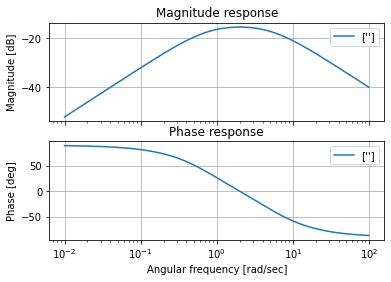

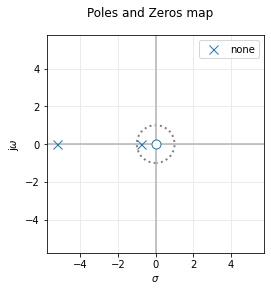

In [44]:
my_tf = TransferFunction( [1, 0], [1, 6, 4] )

bodePlot(my_tf)
pzmap(my_tf)

Para implementarlo, se realzará una red pasiva de orden 2:
<div>
<img src="img/circuito-3.PNG" alt="Drawing" style="width: 300px;"/>
</div>

Su respuesta en frecuencia es:
$$T(s)=\frac{s\frac{w_o}{Q}}{s^2+s\frac{w_o}{Q}+w_o^2}$$

Para implementarlo, se utilizaron los siguientes valores normalizados:
$$R=6$$
$$C=0,25$$
$$L=1$$

A lo que se obtuvieron los siguientes resultados:
<div>
<img src="img/simulacion-3.PNG" alt="Drawing" style="width: 800px;"/>
</div>